In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('medical_examination.csv')

df['overweight'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = df['overweight'].apply(lambda x: 1 if x > 25 else 0)
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars ='cardio', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])


    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio','variable','value'], as_index = False).count()
    
    fig = sns.catplot(x ='variable', y = 'total', data = df_cat, hue = 'value', kind = 'bar', col = 'cardio' ).fig


    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) & 
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
         ]

    # Calculate the correlation matrix
    corr = df_heat.corr(method = 'person')

    # Generate a mask for the upper triangle
    mask = np.triu(corr)



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize = (6,6))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(corr, annot=True, fmt='.1f', linewidths = 1,square = True, mask=mask)


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


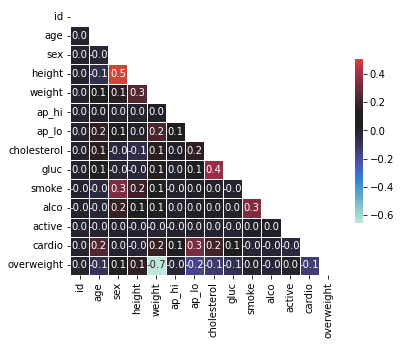

In [2]:
df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) & 
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
         ]

    # Calculate the correlation matrix
corr = df_heat.corr(method = 'pearson')

    # Generate a mask for the upper triangle
mask = np.triu(corr)



    # Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (6,6))

    # Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, annot=True, fmt='.1f', linewidths = 1,square = True, mask=mask,center = 0.08,cbar_kws= {"shrink":0.5})
fig.savefig('heatmap.png')